Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1025 non-null   int64  
 1   sex         1025 non-null   int64  
 2   chestpain   1025 non-null   int64  
 3   bp          1025 non-null   int64  
 4   chol        1025 non-null   int64  
 5   bloodsugar  1025 non-null   int64  
 6   ecg         1025 non-null   int64  
 7   heartrate   1025 non-null   int64  
 8   exercise    1025 non-null   int64  
 9   depression  1025 non-null   float64
 10  target      1025 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 88.2 KB
None

Missing Values per Column:
age           0
sex           0
chestpain     0
bp            0
chol          0
bloodsugar    0
ecg           0
heartrate     0
exercise      0
depression    0
target        0
dtype: int64
[LightGBM] [Info] Number of positive: 421, number of negative: 399
[Ligh

C:\Users\atlal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\atlal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\atlal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


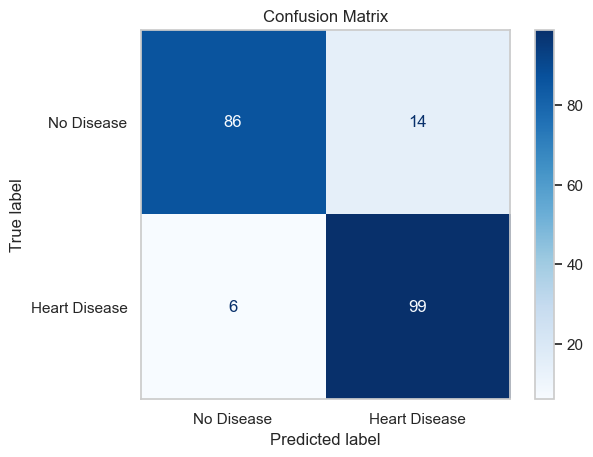


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       100
           1       0.88      0.94      0.91       105

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



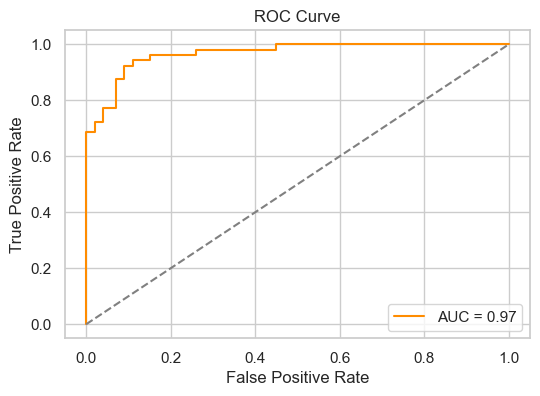

C:\Users\atlal\AppData\Local\Temp\ipykernel_34276\1384598039.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette="Set1")


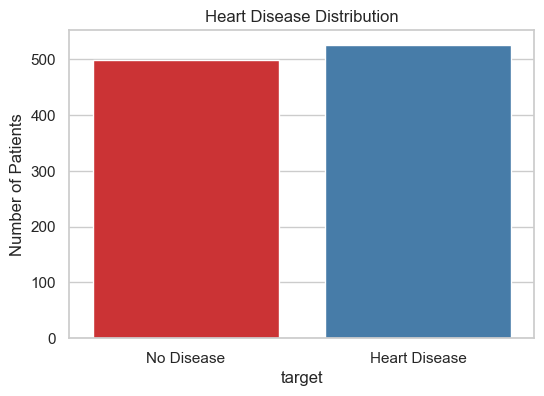

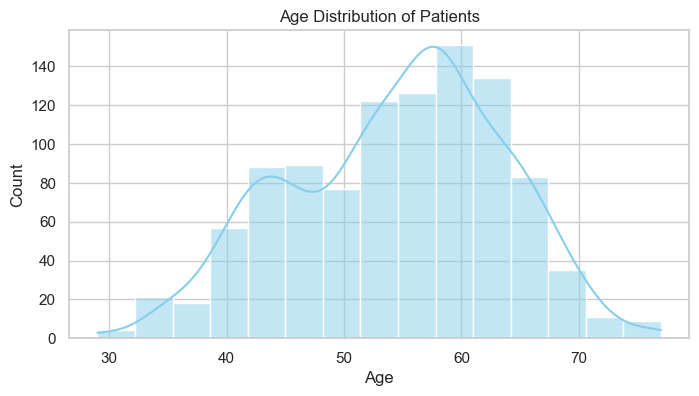

C:\Users\atlal\AppData\Local\Temp\ipykernel_34276\1384598039.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance, y=feat_importance.index, palette="viridis")


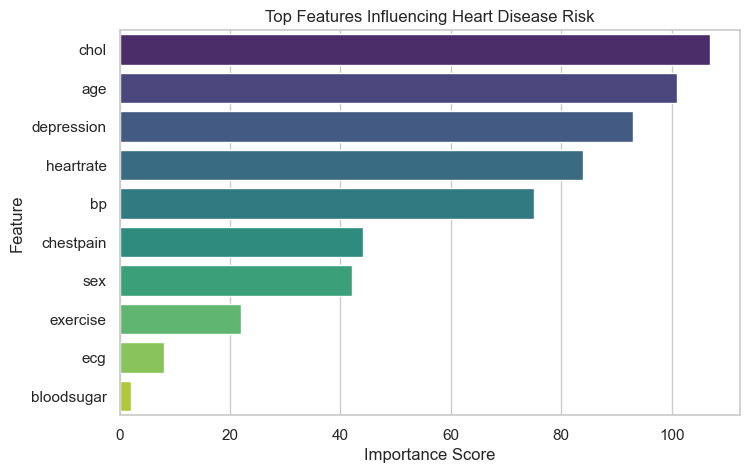

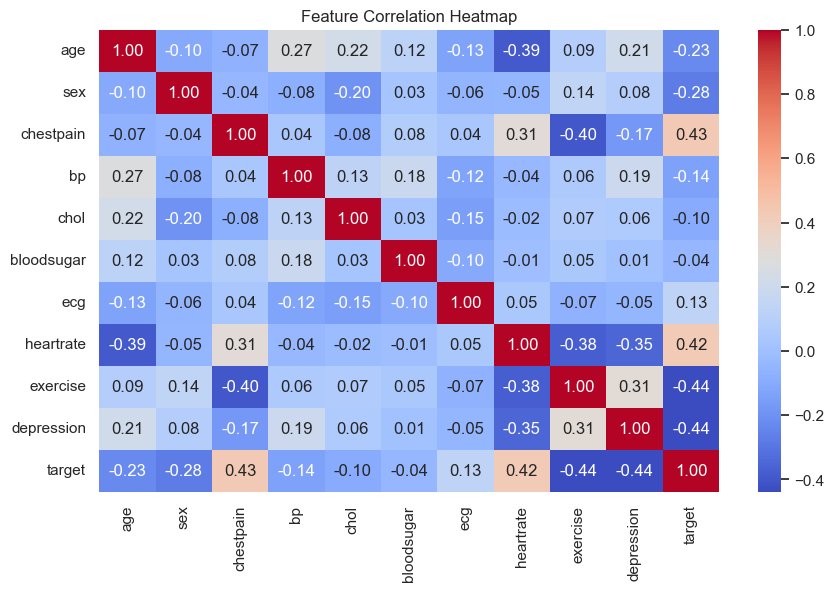

 Enter your health details to predict heart disease risk 
--- INPUT GUIDLINES ---

 Age: 10-90 years
 Sex: 0=Female, 1=Male
 Chest Pain Type: 0=Typical, 1=Atypical, 2=Non-Anginal, 3=Asymptomatic
   - 0 = Typical Angina (classic heart pain, triggered by exercise)
   - 1 = Atypical Angina (unusual heart pain)
   - 2 = Non-Anginal Pain (pain from other causes, not heart)
   - 3 = Asymptomatic (no chest pain even if heart problem exists)
 Resting BP: 90-200 mmHg
 Cholesterol: 100-400 mg/dl
 Fasting Sugar >120 mg/dl: 0=No, 1=Yes
 ECG Result: 0=Normal, 1=ST-T Abnormality, 2=Left Ventricular Hypertrophy
 Max Heart Rate: 60-220 bpm
 Exercise Angina: 0=No, 1=Yes
 ST Depression: 0-6



Age (10-90):  90
Sex (0=Female, 1=Male):  1
Chest Pain Type (0-3):  1
Resting BP (90-200):  190
Cholesterol (100-400):  200
Fasting Sugar >120mg/dl (0=No,1=Yes):  1
ECG Result (0-2):  2
Max Heart Rate (60-220):  90
Exercise Angina (0=No,1=Yes):  1
ST Depression (0-6):  5



--- Prediction Result ---
Heart Disease Probability: 16.65%
Risk Level: Low Risk


C:\Users\atlal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\atlal\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier

data = pd.read_csv("heart1.csv")
print("Dataset Info:")
print(data.info())
print("\nMissing Values per Column:")
print(data.isnull().sum())

features = ['age','sex','chestpain','bp','chol','bloodsugar','ecg','heartrate','exercise','depression']
X = data[features]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LGBMClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print("\nModel Accuracy:", round(accuracy * 100, 2), "%")

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Heart Disease'])
disp.plot(cmap='Blues')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

sns.set(style="whitegrid")

# Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=data, palette="Set1")
plt.title("Heart Disease Distribution")
plt.xticks([0,1], ['No Disease', 'Heart Disease'])
plt.ylabel("Number of Patients")
plt.show()

# Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(data['age'], bins=15, kde=True, color='skyblue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Feature Importance
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_importance, y=feat_importance.index, palette="viridis")
plt.title("Top Features Influencing Heart Disease Risk")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



def risk_level(prob):
    """
    Returns risk category based on predicted probability.
    """
    if prob < 0.3:
        return "Low Risk"
    elif prob < 0.7:
        return "Medium Risk"
    else:
        return "High Risk"



bold = "\033[1m"
reset = "\033[0m"

print(f"{bold} Enter your health details to predict heart disease risk {reset}")
print(f"{bold}--- INPUT GUIDLINES ---{reset}\n")
print(f"{bold} Age:{reset} 10-90 years")
print(f"{bold} Sex:{reset} 0=Female, 1=Male")
print(f"{bold} Chest Pain Type:{reset} 0=Typical, 1=Atypical, 2=Non-Anginal, 3=Asymptomatic")
print("   - 0 = Typical Angina (classic heart pain, triggered by exercise)")
print("   - 1 = Atypical Angina (unusual heart pain)")
print("   - 2 = Non-Anginal Pain (pain from other causes, not heart)")
print("   - 3 = Asymptomatic (no chest pain even if heart problem exists)")
print(f"{bold} Resting BP:{reset} 90-200 mmHg")
print(f"{bold} Cholesterol:{reset} 100-400 mg/dl")
print(f"{bold} Fasting Sugar >120 mg/dl:{reset} 0=No, 1=Yes")
print(f"{bold} ECG Result:{reset} 0=Normal, 1=ST-T Abnormality, 2=Left Ventricular Hypertrophy")
print(f"{bold} Max Heart Rate:{reset} 60-220 bpm")
print(f"{bold} Exercise Angina:{reset} 0=No, 1=Yes")
print(f"{bold} ST Depression:{reset} 0-6\n")

age = int(input("Age (10-90): "))
sex = int(input("Sex (0=Female, 1=Male): "))
chestpain = int(input("Chest Pain Type (0-3): "))
bp = int(input("Resting BP (90-200): "))
chol = int(input("Cholesterol (100-400): "))
bloodsugar = int(input("Fasting Sugar >120mg/dl (0=No,1=Yes): "))
ecg = int(input("ECG Result (0-2): "))
heartrate = int(input("Max Heart Rate (60-220): "))
exercise = int(input("Exercise Angina (0=No,1=Yes): "))
depression = float(input("ST Depression (0-6): "))
user_data = [[age, sex, chestpain, bp, chol, bloodsugar, ecg, heartrate, exercise, depression]]
user_data_scaled = scaler.transform(user_data)
prob = model.predict_proba(user_data_scaled)[0][1]

print("\n--- Prediction Result ---")
print(f"Heart Disease Probability: {round(prob*100,2)}%")
print(f"Risk Level: {risk_level(prob)}")
